Factor Analysis - Case study 1

In [284]:
# import libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [285]:
# import data
input_file = "case_study_1_michigan_suburban.csv" #changed this
df = pd.read_csv(input_file, header=None, sep=",")

# assign headers
df.columns = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC', 'heating', 'cooling', 'lighting', 'constraint', 'EUI',
              'SF', 'v26','v27']

# dropping unnecessary columns CHANGED THIS PART
df.drop(['heating', 'cooling', 'lighting', 'constraint', 'EUI', 'SF','v26','v27'],axis=1,inplace=True)

# show info on dataframe
#df.info()

# display datframe with headers
df.head()

# compute the minimum value per feature on the dataset
min_on_dataset = df.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_dataset = (df - min_on_dataset).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
df_scaled = (df - min_on_dataset) / range_on_dataset

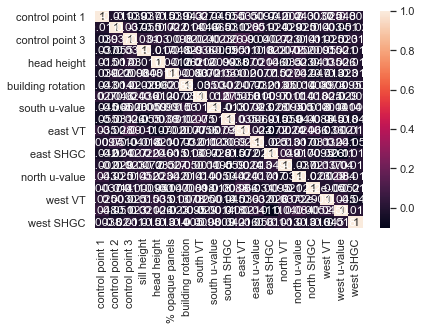

In [286]:
# quick check for dependencies
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [287]:
# check if any columns are linearly dependent (prints rows that are independent)
import sympy 
import numpy as np
#df_new = df.round(decimals=3, out=None)
_, inds = sympy.Matrix(df_new).T.rref()
inds

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)

In [288]:
# Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(190.15250275117964, 0.01176283879739755)

In [289]:
# Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\Users\laura\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.48537302334929283

In [290]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
fa.loadings_
fa.get_communalities()

array([0.03002039, 0.04575337, 0.03764725, 0.05118489, 0.02521113,
       0.00648971, 0.00402519, 0.00263418, 0.00201028, 0.03473677,
       0.195581  , 0.02911618, 0.12268552, 0.0135149 , 0.04429243,
       0.02084767, 0.02838915, 0.15550318, 0.00906458])

Random Forest - Case study 1

In [291]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.svm import SVC

In [292]:
input_file = "case_study_1_michigan_suburban.csv"
df = pd.read_csv(input_file, header=None, sep=",")
df.columns = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC', 'heating', 'cooling', 'lighting', 'constraint', 'EUI',
              'SF', 'v26','v27']
X, y = df.iloc[:, :-8], df.iloc[:, -4]
#print(X)
#print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
#print("Minimum for each feature\n", X_train_scaled.min(axis=0))
#print("Maximum for each feature\n", X_train_scaled.max(axis=0))

# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

forest = RandomForestRegressor(n_estimators=100, random_state=2)
forest.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        forest.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_scaled, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.872


In [293]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': (3,4,5,6,7),'n_estimators': (10, 50, 100, 500, 1000)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0, 
    n_jobs=-1)

grid_result = gsc.fit(X, y)
print(grid_result)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

print(best_params)
print(scores)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (3, 4, 5, 6, 7),
                         'n_estimators': (10, 50, 100, 500, 1000)},
             scoring='neg_mean_squared_error')
{'max_depth': 7, 'n_estimators': 100}
[-12183091.44640475 -10531973.84511925 -13809948.6710423
 -15817892.34549116 -10749557.93137812 -10671953.81539045
 -13450811.98775218 -13646486.53566222 -12903629.06708053
 -12129309.67422557]


In [294]:
results = pd.DataFrame(grid_result.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046675,0.002778,0.004588,0.002239,3,10,"{'max_depth': 3, 'n_estimators': 10}",-6.603948e+14,-9.443367e+14,-4.961604e+14,-6.465326e+14,-6.556927e+14,-6.806234e+14,1.454402e+14,25
1,0.218217,0.023188,0.008178,0.001466,3,50,"{'max_depth': 3, 'n_estimators': 50}",-6.029289e+14,-8.998179e+14,-4.477191e+14,-6.498838e+14,-6.081643e+14,-6.417028e+14,1.462520e+14,23
2,0.425262,0.020897,0.012168,0.000399,3,100,"{'max_depth': 3, 'n_estimators': 100}",-6.404360e+14,-8.873815e+14,-4.310199e+14,-6.506862e+14,-6.298569e+14,-6.478761e+14,1.447601e+14,24
3,2.041943,0.042046,0.047696,0.002095,3,500,"{'max_depth': 3, 'n_estimators': 500}",-6.213792e+14,-8.747312e+14,-4.302142e+14,-6.326550e+14,-6.312354e+14,-6.380430e+14,1.411150e+14,21
4,4.088417,0.055654,0.092505,0.004768,3,1000,"{'max_depth': 3, 'n_estimators': 1000}",-6.182822e+14,-8.839151e+14,-4.309049e+14,-6.441551e+14,-6.264109e+14,-6.407336e+14,1.441432e+14,22


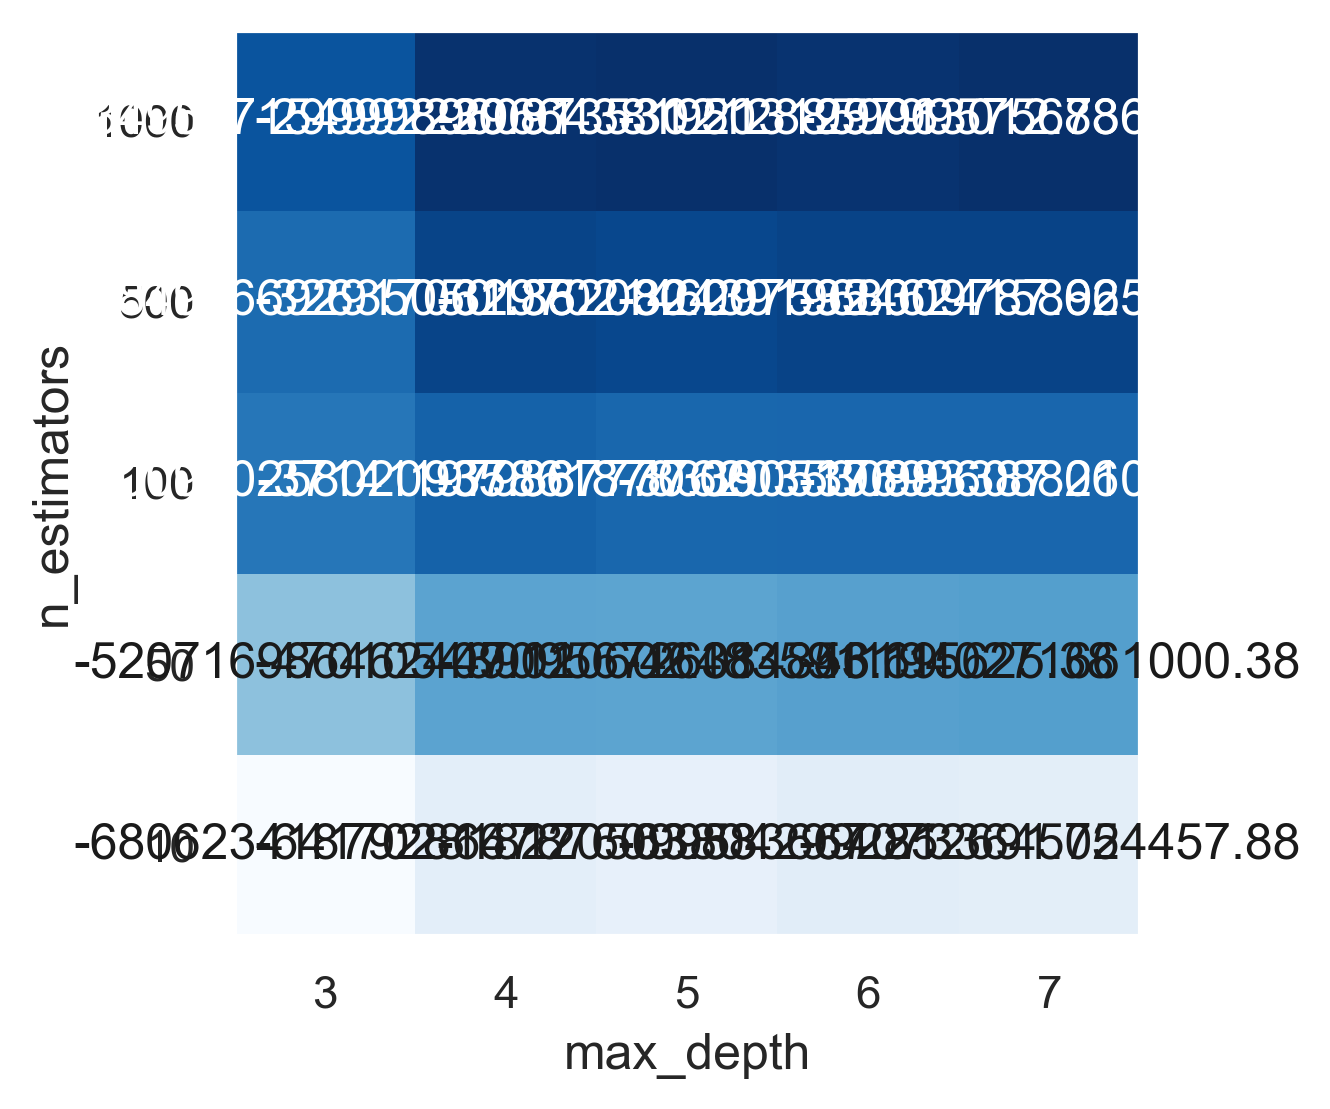

In [295]:
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(dpi=300)
scores = scores.round(decimals=3)
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=['3','4','5','6','7'],
                      ylabel='n_estimators', yticklabels=['10','50','100','500','1000'], cmap="Blues") #viridis

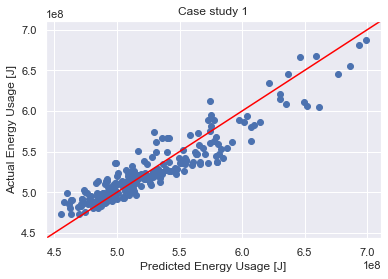

In [296]:
import matplotlib.pyplot as plt
import openpyxl as pyxl
import matplotlib.lines as mlines

predict1 = forest.predict(X_test_scaled)

# plot actual v. predicted
fig, ax = plt.subplots()
ax.scatter( y_test,predict1)
x0,x1 = ax.get_xlim()
ax.set_ylim(x0,x1)
line = mlines.Line2D([0,1], [0,1], color = 'red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title("Case study 1")
plt.xlabel("Predicted Energy Usage [J]")
plt.ylabel("Actual Energy Usage [J]")
plt.show()

Feature ranking:
1. feature 5 (0.403825)
2. feature 8 (0.234647)
3. feature 4 (0.132939)
4. feature 14 (0.109908)
5. feature 15 (0.014389)
6. feature 11 (0.014041)
7. feature 9 (0.012991)
8. feature 17 (0.008596)
9. feature 16 (0.008455)
10. feature 3 (0.006864)
11. feature 13 (0.006732)
12. feature 12 (0.006690)
13. feature 0 (0.006597)
14. feature 18 (0.006273)
15. feature 2 (0.006270)
16. feature 7 (0.006053)
17. feature 6 (0.005229)
18. feature 1 (0.004938)
19. feature 10 (0.004565)


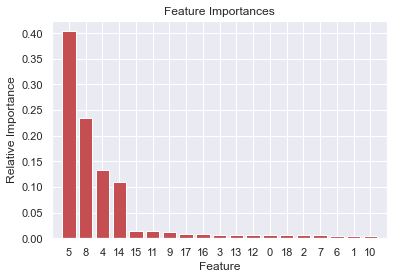

In [297]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
#plt.bar(range(X.shape[1]), importances[indices],
        #color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Relative Importance")
plt.show()

Feature 5 is % opaque panels, feature 8 is south u-value, feature 4 is head height, feature 14 is north u-value

PCA - Case study 1

In [298]:
from sklearn.preprocessing import StandardScaler
input_file = "case_study_1_michigan_suburban_top.csv" #edited
df = pd.read_csv(input_file, header=None, sep=",")
df.columns = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC', 'heating', 'cooling', 'lighting', 'constraint', 'EUI',
              'SF', 'v26','v27']
X, y = df.iloc[:, :-8], df.iloc[:, -4]
#print(X)
#print(y)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [299]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (250, 19)
Reduced shape: (250, 2)


PCA component shape: (2, 19)
PCA components:
[[ 2.67612887e-01  1.11702032e-01  4.04479118e-02  8.25212867e-02
  -3.60493890e-02 -6.18681968e-01 -2.39115490e-02  4.07373254e-02
  -5.01195445e-01 -1.94480486e-02  8.45347256e-02  1.19851354e-01
  -2.06284778e-01  3.38679294e-03 -2.43514165e-01  2.99443422e-01
   2.44667465e-03  1.60291468e-01  1.75632218e-01]
 [-3.27778835e-01  2.27663092e-01  3.34501021e-01 -1.12648874e-02
  -1.45405181e-01 -9.19141849e-02 -5.82327491e-02 -2.79958253e-01
   2.78733446e-01 -1.69400782e-04  3.33454932e-01  7.72686119e-02
  -4.30547724e-02 -3.11196641e-01 -2.69741504e-01  2.16177240e-01
  -3.44706191e-01 -2.88217446e-01  4.91667763e-02]]


Text(0, 0.5, 'Principal components')

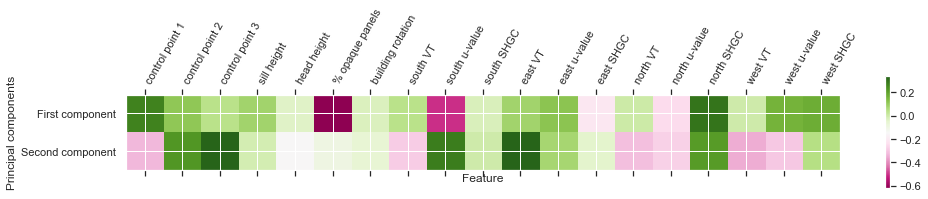

In [300]:
modlabel = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC']
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='PiYG') 
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(modlabel)),
           modlabel, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Original shape: (250, 19)
Reduced shape: (250, 3)
PCA component shape: (3, 19)
PCA components:
[[ 2.67612887e-01  1.11702032e-01  4.04479118e-02  8.25212867e-02
  -3.60493890e-02 -6.18681968e-01 -2.39115490e-02  4.07373254e-02
  -5.01195445e-01 -1.94480486e-02  8.45347256e-02  1.19851354e-01
  -2.06284778e-01  3.38679294e-03 -2.43514165e-01  2.99443422e-01
   2.44667465e-03  1.60291468e-01  1.75632218e-01]
 [-3.27778835e-01  2.27663092e-01  3.34501021e-01 -1.12648874e-02
  -1.45405181e-01 -9.19141849e-02 -5.82327491e-02 -2.79958253e-01
   2.78733446e-01 -1.69400782e-04  3.33454932e-01  7.72686119e-02
  -4.30547724e-02 -3.11196641e-01 -2.69741504e-01  2.16177240e-01
  -3.44706191e-01 -2.88217446e-01  4.91667763e-02]
 [-9.12456192e-03 -4.01223294e-01 -2.70164056e-01 -1.22367335e-01
   2.06341203e-02 -6.42475655e-02 -2.83226938e-01  1.47376989e-02
   2.92074000e-01  2.96850718e-01 -2.34333931e-02  1.37942588e-02
  -3.99733368e-01 -2.50388050e-01 -3.66991876e-01  1.99301001e-02
   7.070811

Text(0, 0.5, 'Principal components')

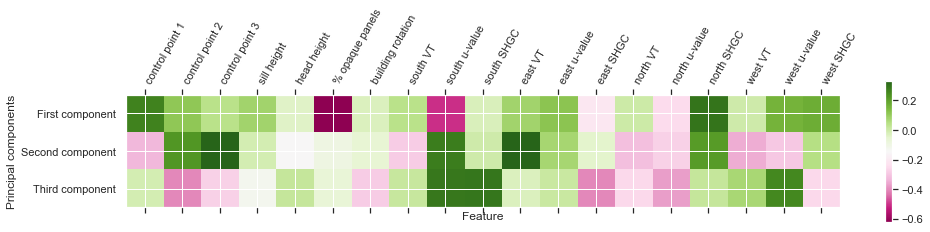

In [301]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=3)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

modlabel = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC']
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='PiYG')
plt.yticks([0, 1, 2], ["First component", "Second component","Third component"])
plt.colorbar()
plt.xticks(range(len(modlabel)),
           modlabel, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

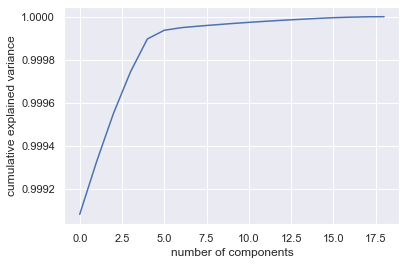

In [302]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

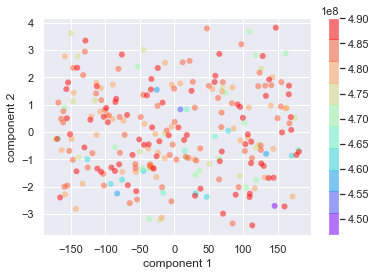

In [303]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)


plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

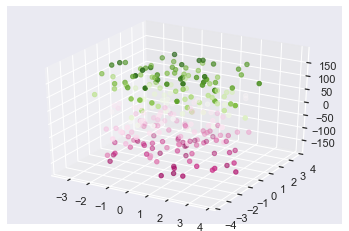

In [304]:
ax = plt.axes(projection='3d')

pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

# Data for three-dimensional scattered points
zdata = projected[:, 0]
xdata = projected[:, 1]
ydata = projected[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='PiYG');

Random Forest - Case study 2

In [334]:
input_file = "case_study_2_texas_urban.csv"
df = pd.read_csv(input_file, header=None, sep=",")
X, y = df.iloc[:, :-7], df.iloc[:, -7]
#print(X)
#print(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#forest = RandomForestRegressor(n_estimators=500, random_state=1)
#forest.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
#print("Minimum for each feature\n", X_train_scaled.min(axis=0))
#print("Maximum for each feature\n", X_train_scaled.max(axis=0))

# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

forest = RandomForestRegressor(max_depth=7,n_estimators=1000, random_state=2)
forest.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_scaled, y_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.830


In [333]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': (3,4,5,6,7),'n_estimators': (10, 50, 100, 500, 1000)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0, 
    n_jobs=-1)

grid_result = gsc.fit(X, y)
print(grid_result)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

print(best_params)
print(scores)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (3, 4, 5, 6, 7),
                         'n_estimators': (10, 50, 100, 500, 1000)},
             scoring='neg_mean_squared_error')
{'max_depth': 7, 'n_estimators': 1000}
[-1.67786049e+11 -1.89095092e+11 -1.99345393e+11 -1.92179116e+11
 -1.50273338e+11 -1.97774528e+11 -1.85407029e+11 -2.05213708e+11
 -1.86091412e+11 -2.00346091e+11]


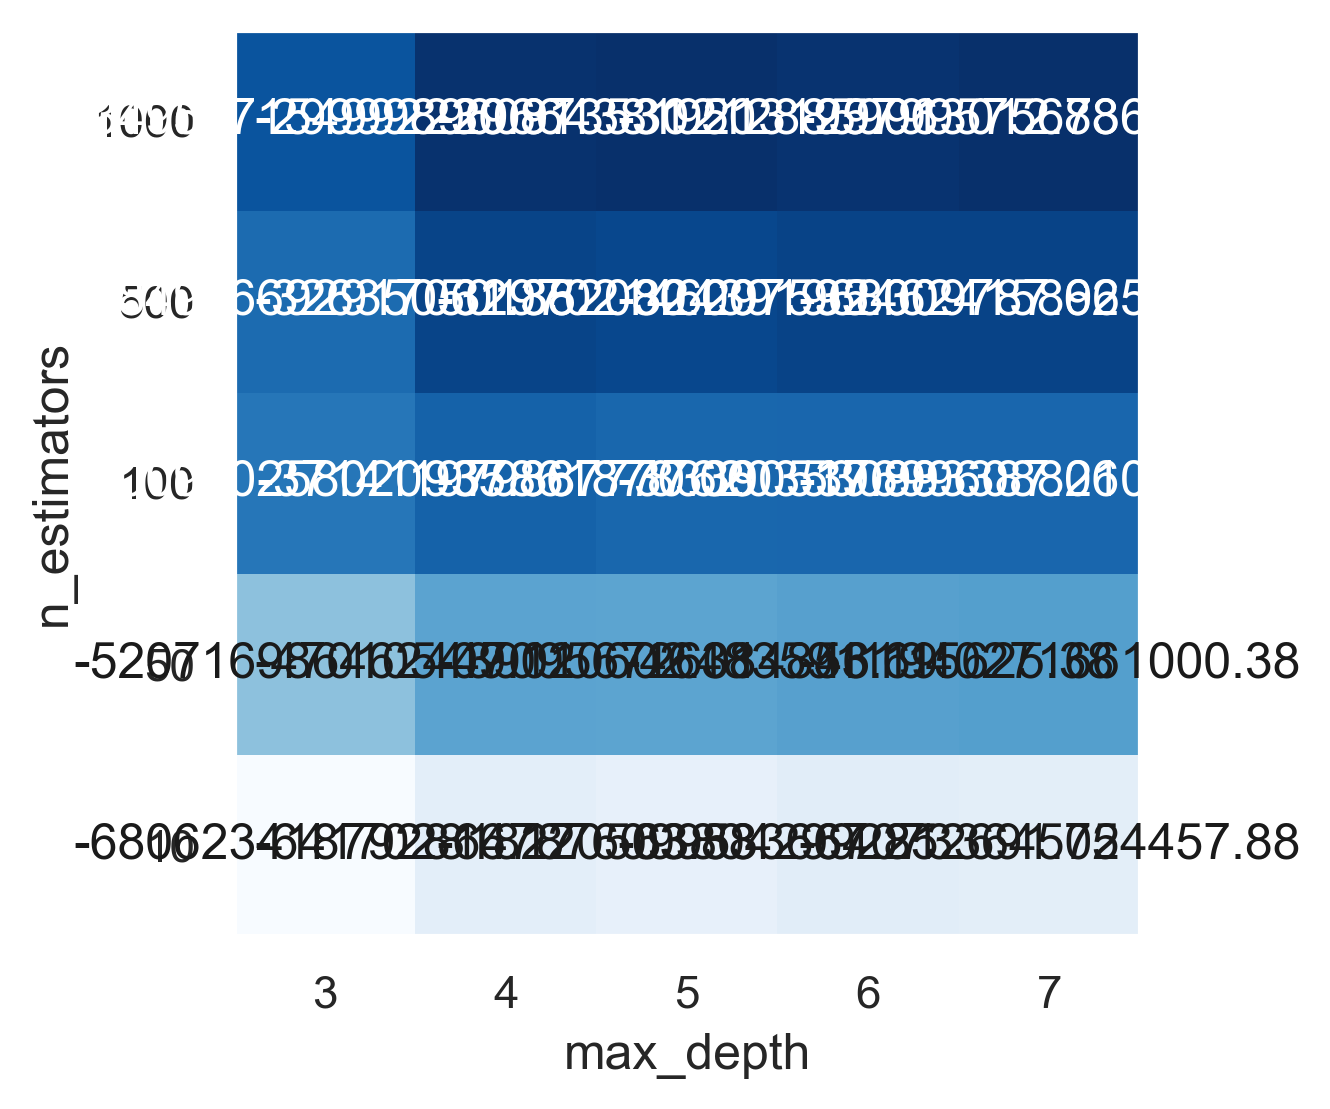

In [335]:
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(dpi=300)
scores = scores.round(decimals=3)
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=['3','4','5','6','7'],
                      ylabel='n_estimators', yticklabels=['10','50','100','500','1000'], cmap="Blues") #viridis

Feature ranking:
1. feature 7 (0.514167)
2. feature 6 (0.223980)
3. feature 18 (0.041858)
4. feature 12 (0.029198)
5. feature 21 (0.023260)
6. feature 15 (0.020573)
7. feature 5 (0.016170)
8. feature 0 (0.014386)
9. feature 22 (0.011065)
10. feature 13 (0.010955)
11. feature 14 (0.010035)
12. feature 9 (0.009975)
13. feature 19 (0.008332)
14. feature 11 (0.008302)
15. feature 16 (0.007902)
16. feature 10 (0.007721)
17. feature 1 (0.007174)
18. feature 17 (0.007132)
19. feature 20 (0.006589)
20. feature 8 (0.005793)
21. feature 2 (0.005601)
22. feature 4 (0.005279)
23. feature 3 (0.004553)


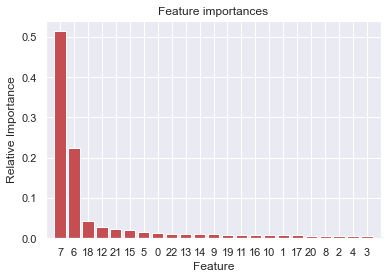

In [306]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Relative Importance")
plt.show()

Feature 7 is % opaque panels, feature 6 is head height

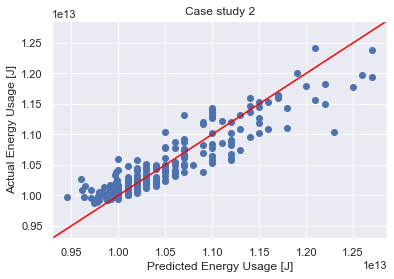

In [307]:
import matplotlib.pyplot as plt
import openpyxl as pyxl
import matplotlib.lines as mlines

predict1 = forest.predict(X_test_scaled)

# plot actual v. predicted
fig, ax = plt.subplots()
ax.scatter( y_test, predict1)
x0,x1 = ax.get_xlim()
ax.set_ylim(x0,x1)
line = mlines.Line2D([0,1], [0,1], color = 'red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title("Case study 2")
plt.xlabel("Predicted Energy Usage [J]")
plt.ylabel("Actual Energy Usage [J]")
plt.show()

PCA - Case study 2

In [308]:
from sklearn.preprocessing import StandardScaler
input_file = "case_study_2_texas_urban_top.csv" #edited
df = pd.read_csv(input_file, header=None, sep=",")
df.columns = ['tower:base building volume', 'base length:width', 'tower length:width', 'tower location y', 'tower location x', 'sill height', 
       'head height','% of opaque panels','site location y','site location x','tower rotation','south VT','south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC','EUI', 'heating', 'cooling', 'lighting', 'x1', 'x2',
              'x3']
X, y = df.iloc[:, :-7], df.iloc[:, -7]
#print(X)
#print(y)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [309]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (250, 23)
Reduced shape: (250, 2)


PCA component shape: (2, 23)
PCA components:
[[ 0.39920737  0.06455605 -0.07849466  0.05456279  0.27172835  0.19701962
  -0.36807221 -0.53131177  0.00197626  0.00926338  0.04007985  0.10620934
  -0.14472972 -0.2390492   0.18386852 -0.22951131 -0.15990115  0.21244008
  -0.09216012  0.04673629  0.05715089 -0.15855595  0.09783218]
 [-0.01107568  0.11745397 -0.21190097 -0.3130149   0.29822093 -0.15603111
  -0.17291023 -0.01446572 -0.12877941 -0.13467578 -0.24488663  0.3319664
   0.20371524 -0.02135785 -0.28780391  0.03520596  0.34581475  0.08671384
  -0.15842455  0.20129409 -0.30503757  0.0286118  -0.28688345]]


Text(0, 0.5, 'Principal components')

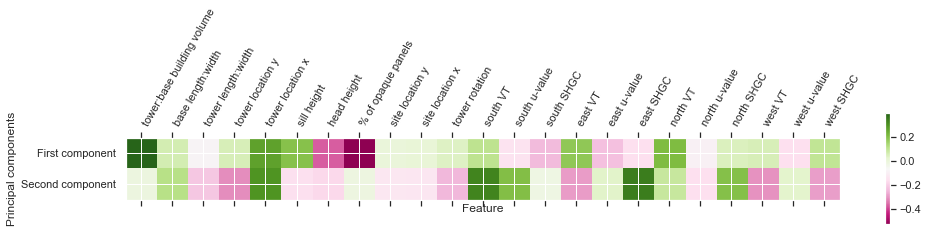

In [310]:
modlabel = ['tower:base building volume', 'base length:width', 'tower length:width', 'tower location y', 'tower location x', 'sill height', 
       'head height','% of opaque panels','site location y','site location x','tower rotation','south VT','south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC']
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='PiYG') 
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(modlabel)),
           modlabel, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Original shape: (250, 23)
Reduced shape: (250, 3)
PCA component shape: (3, 23)
PCA components:
[[ 0.39920737  0.06455605 -0.07849466  0.05456279  0.27172835  0.19701962
  -0.36807221 -0.53131177  0.00197626  0.00926338  0.04007985  0.10620934
  -0.14472972 -0.2390492   0.18386852 -0.22951131 -0.15990115  0.21244008
  -0.09216012  0.04673629  0.05715089 -0.15855595  0.09783218]
 [-0.01107568  0.11745397 -0.21190097 -0.3130149   0.29822093 -0.15603111
  -0.17291023 -0.01446572 -0.12877941 -0.13467578 -0.24488663  0.3319664
   0.20371524 -0.02135785 -0.28780391  0.03520596  0.34581475  0.08671384
  -0.15842455  0.20129409 -0.30503757  0.0286118  -0.28688345]
 [-0.17661076 -0.07303363 -0.08220032 -0.14015881 -0.01773727  0.25378444
  -0.23136647 -0.25185065 -0.17694131  0.4184398   0.16910651 -0.08601368
   0.16915437  0.09710999 -0.28162933 -0.16776044  0.04102141 -0.35863022
  -0.18247348 -0.18728866  0.12950295  0.38976151  0.01175942]]


Text(0, 0.5, 'Principal components')

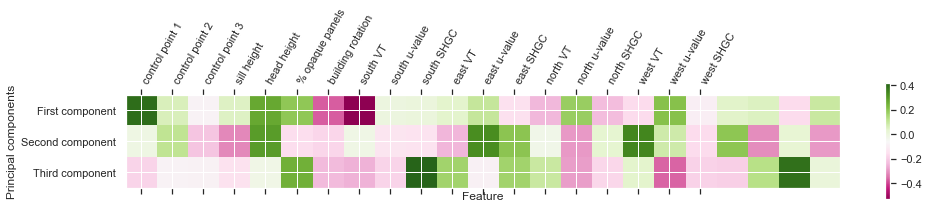

In [311]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=3)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

modlabel = ['control point 1', 'control point 2', 'control point 3', 'sill height', 'head height', '% opaque panels', 
       'building rotation','south VT', 'south u-value', 'south SHGC', 'east VT', 'east u-value','east SHGC', 'north VT',
              'north u-value', 'north SHGC', 'west VT', 'west u-value', 'west SHGC']
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='PiYG')
plt.yticks([0, 1, 2], ["First component", "Second component","Third component"])
plt.colorbar()
plt.xticks(range(len(modlabel)),
           modlabel, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

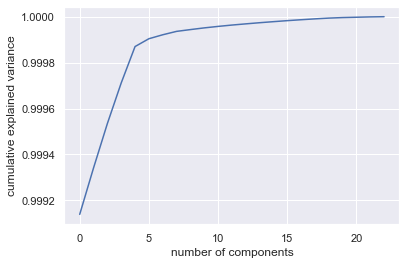

In [312]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

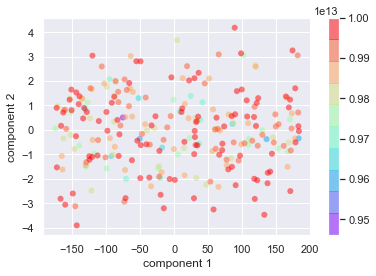

In [313]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)


plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

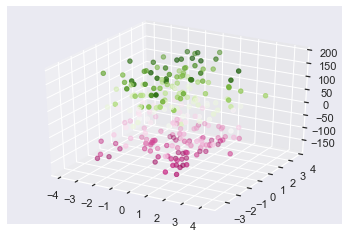

In [314]:
ax = plt.axes(projection='3d')

pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

# Data for three-dimensional scattered points
zdata = projected[:, 0]
xdata = projected[:, 1]
ydata = projected[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='PiYG');